# Sentiment Analysis
----

## Data Load

In [122]:
import pandas as pd

# corpus/economics.corpus
df_corpus = pd.read_pickle('corpus/economics.corpus')
df_corpus.sample(5)

,AvgTone,EventID,sentiment,text,url
1176,-0.892857,509668235,0,The government of Norway announced on Wednesda...,2021 http://www.eco-business.com/news/norwa...
879,-0.533779,597548599,0,"The developers behind Islet G, a small artific...",1700 http://www.eco-business.com/news/contr...
909,0.354472,584360870,0,DUBLIN--(BUSINESS WIRE)--Research and Markets ...,1743 http://www.businesswire.com/news/home/...
5,-8.750000,500397586,-1,"Round two, industry.\n\nFour months after Indo...",2058 http://www.eco-business.com/news/indon...
364,-5.978075,798767907,-1,The summons of Mr Riady follows the arrests th...,806 https://www.businesstimes.com.sg/govern...


In [123]:
df_corpus.shape

(1207, 5)

## Data Preparation

In [209]:
from sklearn.model_selection import train_test_split

X = df_corpus.text
i = df_corpus.url
X_train, X_test, i_train, i_test = train_test_split(X, i, test_size=0.02, random_state=42)

In [186]:
from nltk.stem.porter import PorterStemmer
import re
from nltk import word_tokenize         

porter_stemmer = PorterStemmer()

def custom_tokenizer(str_input):
    words = re.sub(r"[^a-z]|\b\w{0,3}\b", " ", str_input).lower().split()
#     words = [porter_stemmer.stem(word) for word in words]
    return words

def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems
    
def get_similarity_matrix(content_as_str):
    tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000, min_df=0.2,
                                       stop_words='english',use_idf=True,
                                       tokenizer=tokenize_and_stem, ngram_range=(1,3))
    tfidf_matrix = tfidf_vectorizer.fit_transform(content_as_str) #fit the vectorizer to synopses
    similarity_matrix = cosine_similarity(tfidf_matrix)
    return (similarity_matrix, tfidf_matrix)


In [189]:
# ekstraksi fitur

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import text

my_stop_words = text.ENGLISH_STOP_WORDS.union(["jakarta","jokowi",'said','says','just',
                                               "widodo","joko",'singapore','www','com'
                                               'indonesia','indonesians','bali','japan','korea',
                                               'indonesian','thailand','china', 'asia', 'asian',
                                               'vietnam','australian','australia', 'york','s','java','chinese',
                                               'india','malaysia','hong'])
my_stop_words = my_stop_words.union(["january","february","march",'april','may','june','july','august','september','october','november','december'])

my_stop_words = my_stop_words.union(["sunday","monday","tuesday",'thursday','wednesday','friday','year','years'
                                     'days','week','weeks','day','date','time'])


vectorizer = TfidfVectorizer(analyzer=u'word', tokenizer=custom_tokenizer, stop_words=my_stop_words, min_df=0.05, max_df=0.8, lowercase=True)
X = vectorizer.fit_transform(X_train)

X_train_dtm = vectorizer.transform(X_train)

In [190]:
pd.DataFrame(X_train_dtm.toarray(), columns=vectorizer.get_feature_names())

,able,access,according,account,accused,achieve,action,actions,activists,activities,...,women,work,worked,workers,working,world,worst,worth,writing,years
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.151594,0.090030,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.044064
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.074723,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.044644,0.028968,0.000000,0.000000,0.000000,0.022981,0.027296,0.054807,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.012481,0.000000,0.000000,0.000000,0.066798
3,0.000000,0.000000,0.019592,0.000000,0.000000,0.000000,0.000000,0.000000,0.037067,0.139906,...,0.000000,0.118218,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.018071
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250612,0.000000
5,0.000000,0.000000,0.034634,0.000000,0.000000,0.000000,0.109904,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.029844,0.000000,0.000000,0.000000,0.031946
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.159436,0.055340,0.000000,0.061888,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.173340,0.000000,0.000000,0.000000,0.000000,0.065215,0.000000,0.000000,0.066242
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.039900


# K-Means Clustering 
----

In [194]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

true_k = 7
model = KMeans(n_clusters=true_k, init='k-means++',  max_iter=100, n_init=2)
model.fit(X_train_dtm)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

    
for i in range(true_k):
    
    t = []
    for ind in order_centroids[i, :40]:
        t.append(terms[ind])
    
    print("Cluster %d:" % i, ','.join(t),'\n')


Top terms per cluster:
Cluster 0: insider,airport,people,twitter,business,instagram,facebook,site,inbox,island,emails,alerts,videos,follow,linkedin,highlights,email,travel,watch,join,told,address,post,source,according,like,family,authorities,following,years,killed,international,media,board,today,hours,photo,look,best,agency 

Cluster 1: coal,energy,power,mining,plant,plants,project,government,cent,resources,climate,emissions,company,country,capacity,development,ministry,water,demand,million,companies,production,sector,environmental,pollution,agreement,countries,local,global,philippines,greenpeace,world,change,fuel,industry,projects,owned,prices,east,expansion 

Cluster 2: cent,market,bank,company,growth,billion,business,million,global,percent,government,investment,financial,group,world,industry,markets,report,companies,rupiah,economy,services,products,country,development,revenue,assets,share,countries,research,including,demand,data,years,international,economic,trillion,sales,central,in

In [212]:
X_test_dtm = vectorizer.transform(X_test)
prediction = model.predict(X_test_dtm)

result = pd.DataFrame(i_test)
result['cluster'] = prediction
result

,url,cluster
101,2026 http://www.businesswire.com/news/home/...,4
260,424 http://www.eco-business.com/news/dutch-...,5
1083,1903 http://www.businesstimes.com.sg:80/ene...,1
109,1880 http://www.businessinsider.com/r-indon...,4
649,1497 http://www.businessinsider.com/r-updat...,4
736,225 https://www.businessinsider.com.au/bill...,0
332,1041 http://www.econotimes.com/Palu-earthqu...,4
49,304 http://www.eco-business.com/news/have-w...,6
461,1296 http://www.econotimes.com/Global-Geo-p...,4
921,1764 http://www.businessinsider.com/r-indon...,4


In [160]:
#set up cluster names using a dict

cluster_names = {0: 'International Trade and Investment', 
                 1: 'Corporate Business', 
                 2: 'Energy', 
                 3: 'Security', 
                 4: 'Environment', 
                 5: 'Tourism',
                 6: 'Government Policy',
                 7: 'Forest'}


In [213]:
from yellowbrick.text import TSNEVisualizer

tsne = TSNEVisualizer()
tsne.fit(X_train_dtm, ["Cluster {}".format(c) for c in model.labels_])
tsne.poof()

ModuleNotFoundError: No module named 'yellowbrick'

### Evaluation

In [232]:
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score

labels = model.labels_
dbi_score = davies_bouldin_score(X_train_dtm.toarray(), labels)  
print("DBI Score", dbi_score)

sil_score = silhouette_score(X_train_dtm.toarray(), labels)  
print("Sil Score", sil_score)

DBI Score 5.0248879298336036
Sil Score 0.03242466332393282


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


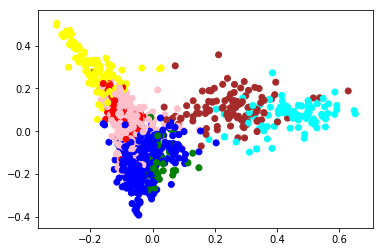

In [276]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA as sklearnPCA

pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pca.fit_transform(X_train_dtm.toarray())

colors = ['red','green','blue','yellow','pink','brown','aqua']


result = pd.DataFrame(transformed)
result['cluster'] = labels
result['color'] = list(map(lambda x: colors[x], labels))

plt.scatter(result[0], result[1], c=result['color'])
# plt.legend()
plt.show()

# MiniBatchKMeans Clustering 
----

In [177]:
from sklearn.cluster import MiniBatchKMeans
import numpy as np

n = 7
kmeans = MiniBatchKMeans(n_clusters=n,
        random_state=0,
        batch_size=1)
kmeans.fit(X_train_dtm)

order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]

for i in range(n):    
    t = []
    for ind in order_centroids[i, :40]:
        t.append(terms[ind])
    
    print("Cluster %d:" % i, ','.join(t),'\n')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:1556: RuntimeWarning: init_size=3 should be larger than k=7. Setting it to 3*k
  init_size=init_size)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:1556: RuntimeWarning: init_size=3 should be larger than k=7. Setting it to 3*k
  init_size=init_size)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:1556: RuntimeWarning: init_size=3 should be larger than k=7. Setting it to 3*k
  init_size=init_size)


Cluster 0: life,court,malaysian,workers,domestic,according,sought,dollars,death,included,conditions,committed,seven,protect,lack,face,little,action,days,latest,right,result,case,term,rights,working,head,recent,month,sentifi,voices,work,largest,including,told,market,years,announced,following,forests 

Cluster 1: police,residents,company,women,mongabay,people,north,project,meeting,arrested,local,community,plant,construction,power,district,area,school,representatives,village,case,mining,communities,land,according,came,central,citizens,forest,equipment,went,activities,officials,group,report,chief,team,asked,build,know 

Cluster 2: southeast,attacks,muslim,article,attack,linked,region,political,police,large,claimed,people,relatively,fight,planning,estimated,islamic,countries,majority,population,recently,small,efforts,reported,groups,social,known,number,media,long,smaller,organisations,increasingly,certain,stock,points,avoid,concerned,videos,threat 

Cluster 3: sectors,businesses,revenue,cen

### Evaluation

In [176]:
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score

labels = kmeans.labels_
dbi_score = davies_bouldin_score(X_train_dtm.toarray(), labels)  
print("DBI Score", dbi_score)

# sil_score = silhouette_score(X_train_dtm.toarray(), labels)  
# print("Sil Score", sil_score)

DBI Score 2.139364572019166
Sil Score -0.00954286687527066


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: invalid value encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


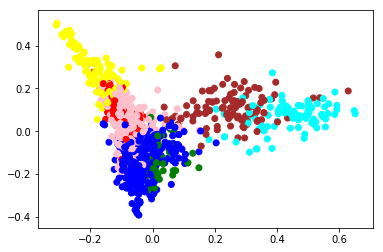

In [275]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA as sklearnPCA

pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pca.fit_transform(X_train_dtm.toarray())

colors = ['red','green','blue','yellow','pink','brown','aqua']


result = pd.DataFrame(transformed)
result['cluster'] = labels
result['color'] = list(map(lambda x: colors[x], labels))

plt.scatter(result[0], result[1], c=result['color'])
# plt.legend()
plt.show()